In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dataset.dataset import get_formated_data_frames
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
formated_data_frame = get_formated_data_frames()

21-Apr-2022 14:48:14 DEBUG utils - Directory ./ already exists. Skipping.
21-Apr-2022 14:48:14 INFO GEOparse - File already exist: using local version.
21-Apr-2022 14:48:14 INFO GEOparse - Parsing ./GSE22552_family.soft.gz: 
21-Apr-2022 14:48:14 DEBUG GEOparse - DATABASE: GeoMiame
21-Apr-2022 14:48:14 DEBUG GEOparse - SERIES: GSE22552
21-Apr-2022 14:48:14 DEBUG GEOparse - PLATFORM: GPL570
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/GEOparse/GEOparse.py:401: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  return read_csv(StringIO(data), index_col=None, sep="\t")
21-Apr-2022 14:48:15 DEBUG GEOparse - SAMPLE: GSM559689
21-Apr-2022 14:48:15 DEBUG GEOparse - SAMPLE: GSM559690
21-Apr-2022 14:48:15 DEBUG GEOparse - SAMPLE: GSM559691
21-Apr-2022 14:48:15 DEBUG GEOparse - SAMPLE: GSM559692
21-Apr-2022 14:48:15 DEBUG GEOparse - SAMPLE: GSM559693
21-Apr-2022 14:48:15 DEBUG GEOparse - SAMPLE: GSM559694
21-Apr

In [3]:
# Task 1:
# a. Log-transformation if needed; is it needed?
# b. Imputation of missing values using mean values if needed; is it needed?
# c. Quantile normalisation to remove batch effect
# d. Summarise probes that are linked to the same gene by using the median; i.e. when multiple rows have the same gene label, make them a single row for that gene

a. Log transformation is not needed since NCBI already provides the data log-transformed.

In [4]:
formated_data_frame

,,,CFU,Int,Late,Pro
ID_REF,Gene Symbol,ENTREZ_GENE_ID,,,,
1053_at,RFC2,5982,8.428814,7.797399,5.268096,8.394127
117_at,HSPA6,3310,5.838414,7.065860,7.910083,5.830218
121_at,PAX8,7849,7.183569,7.252154,7.770219,7.194605
1294_at,MIR5193,7318,7.133072,7.409423,6.497654,7.062021
1316_at,THRA,7067,6.677613,7.086486,8.047467,6.581211
...,...,...,...,...,...,...
AFFX-r2-P1-cre-3_at,nan,nan,13.110768,13.299282,13.267779,13.086157
AFFX-r2-P1-cre-5_at,nan,nan,13.181870,13.327134,13.316122,13.141793
AFFX-ThrX-3_at,nan,nan,9.058028,9.545793,10.357162,8.886965


In [5]:
formated_data_frame.isna().any().any()

False

b. Imputation of missing values is not needed because there is no missing values in the datafram

c. Quantile normalisation to remove batch effect

In [6]:
formated_data_frame.reset_index(['ID_REF', 'ENTREZ_GENE_ID'], inplace=True, drop=True)

In [7]:
formated_data_frame.reset_index('Gene Symbol', inplace=True)

In [8]:
formated_data_frame = formated_data_frame[list((formated_data_frame[formated_data_frame != 'nan']).notna()['Gene Symbol'].values)]

In [9]:
formated_data_frame.set_index('Gene Symbol', inplace=True)

In [10]:
# quantile normalization
tmp = np.mean(np.sort(formated_data_frame.values, axis=0), axis=1)
original_index = np.argsort(np.argsort(formated_data_frame.values, axis=0), axis=0)
data_quantile_normalised = pd.DataFrame(tmp[original_index], index=formated_data_frame.index, columns=formated_data_frame.columns)
data_quantile_normalised

,CFU,Int,Late,Pro
Gene Symbol,,,,
RFC2,8.316557,7.725953,5.642252,8.238732
HSPA6,5.736378,7.015665,8.273149,5.704984
PAX8,7.088659,7.195130,8.143391,7.065342
MIR5193,7.035765,7.344286,6.674461,6.944849
THRA,6.623133,7.035153,8.400083,6.511422
...,...,...,...,...
GAPDH,13.490629,12.768533,11.993449,13.277600
GAPDH,12.017020,11.349423,9.915780,11.978532
GAPDH,13.091035,12.329017,11.270733,12.945616


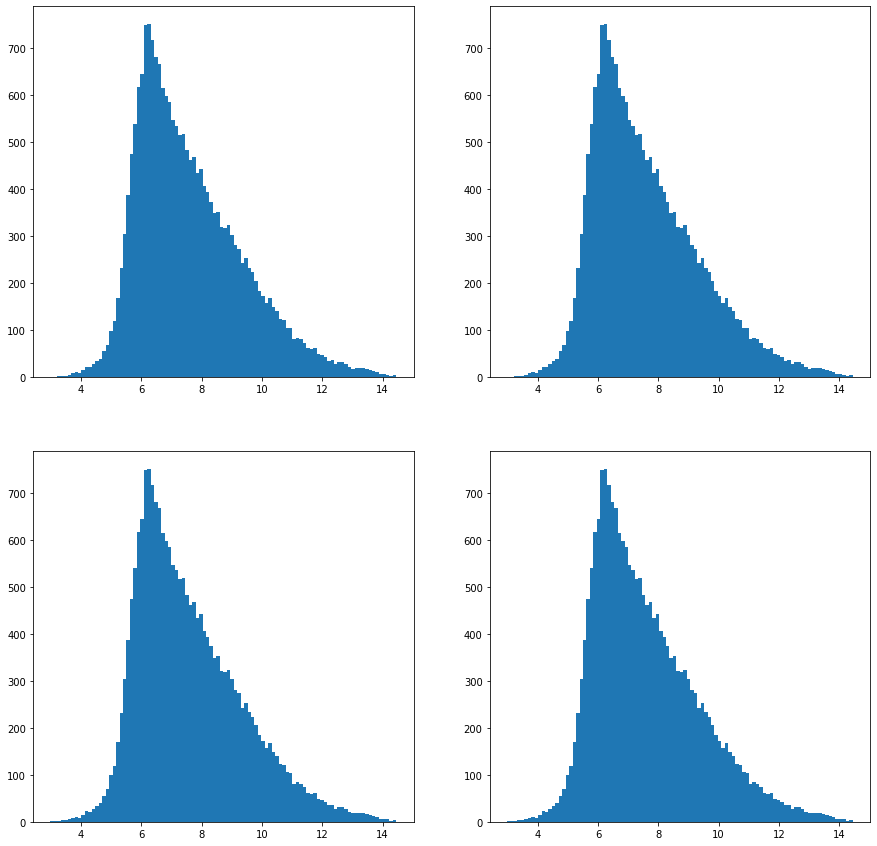

In [11]:
f, ax = plt.subplots(2,2, figsize=(15,15))

ax[0,0].hist(data_quantile_normalised.iloc[:,0], bins=100)
ax[0,1].hist(data_quantile_normalised.iloc[:,1], bins=100)
ax[1,0].hist(data_quantile_normalised.iloc[:,2], bins=100)
ax[1,1].hist(data_quantile_normalised.iloc[:,3], bins=100)
plt.show()

d. Summarise probes that are linked to the same gene by using the median; i.e. when multiple rows have the same gene label, make them a single row for that gene

In [12]:
data = data_quantile_normalised.groupby('Gene Symbol').median()
data

,CFU,Int,Late,Pro
Gene Symbol,,,,
A1BG-AS1,6.112539,6.220931,6.892030,6.091815
A4GALT,7.186654,7.387356,8.073196,7.510358
AAAS,7.823194,7.402945,7.417205,7.792582
AACS,7.527722,7.286827,7.270861,7.414133
AAED1,6.743789,5.373613,5.470805,6.529302
...,...,...,...,...
ZYX,6.457492,5.950081,6.743789,6.313909
ZZEF1,6.517973,6.374606,6.805477,6.357669
ZZZ3,8.601689,8.162945,8.271932,8.446459


In [19]:
scaled_data = StandardScaler().fit_transform(data.T)

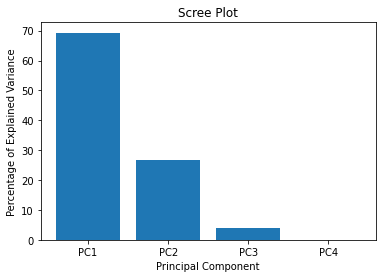

In [22]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
# create a bar plot
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

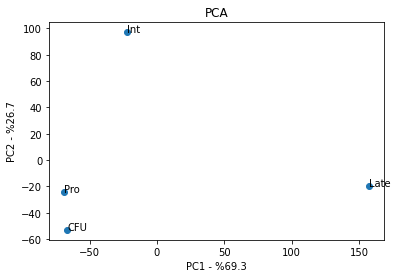

In [23]:
pca_df = pd.DataFrame(pca_data, index=data.columns, columns=labels)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA')
plt.xlabel('PC1 - %{}'.format(per_var[0]))
plt.ylabel('PC2 - %{}'.format(per_var[1]))
for sample in pca_df.index:
  plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()


In [41]:
df = data.T
features = df.columns.values
y = df.index.values
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

array([[-0.65982757, -1.07169694,  1.07501535, ...,  1.38000828,
        -0.75345515,  1.36587301],
       [-0.32992237, -0.4619188 , -1.03398328, ..., -1.24184112,
         0.26945042, -1.38545016],
       [ 1.71265499,  1.62182485, -0.96242334, ..., -0.59055396,
         1.51529957,  0.33745239],
       [-0.72290504, -0.08820912,  0.92139128, ...,  0.45238679,
        -1.03129483, -0.31787525]])

In [46]:
df.reset_index(inplace=True)

In [51]:
df.rename(columns={'index': 'Genes'}, inplace=True)
df

Gene Symbol,Genes,A1BG-AS1,A4GALT,AAAS,AACS,AAED1,AAGAB,AAK1,AAMDC,AAMP,...,ZWILCH,ZWINT,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3,hsa-let-7a-3,mir-223
0,CFU,6.112539,7.186654,7.823194,7.527722,6.743789,7.271689,6.691704,7.242769,8.437946,...,9.651354,12.002283,5.519769,5.974309,8.395431,6.457492,6.517973,8.601689,5.909118,6.698166
1,Int,6.220931,7.387356,7.402945,7.286827,5.373613,7.221843,6.510989,6.967792,7.643105,...,9.602923,11.859736,5.605683,6.719159,8.822174,5.950081,6.374606,8.162945,6.233203,4.493315
2,Late,6.892030,8.073196,7.417205,7.270861,5.470805,6.382957,8.359987,7.232786,9.118262,...,7.246273,9.151265,4.962931,6.753002,7.910095,6.743789,6.805477,8.271932,6.627924,5.874012
3,Pro,6.091815,7.510358,7.792582,7.414133,6.529302,7.175501,6.741949,7.312508,8.055142,...,9.674264,11.812375,5.672725,6.015016,8.578369,6.313909,6.357669,8.446459,5.821091,5.348846


In [52]:
pca2 = PCA(n_components=2)
pcs = pca2.fit_transform(x)
pc_df = pd.DataFrame(data=pcs, columns=['PC1', 'PC2'])
findal_df = pd.concat([pc_df, df[['Genes']]], axis=1)

In [53]:
findal_df

,PC1,PC2,Genes
0,-66.624058,-53.101432,CFU
1,-22.082434,97.145905,Int
2,157.344996,-19.540195,Late
3,-68.638504,-24.504278,Pro


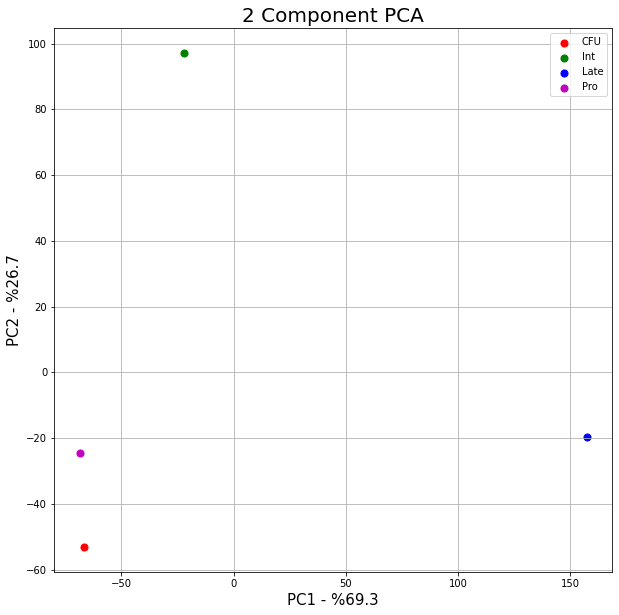

In [54]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC1 - %{}'.format(per_var[0]), fontsize=15)
ax.set_ylabel('PC2 - %{}'.format(per_var[1]), fontsize=15)
ax.set_title('2 Component PCA', fontsize=20)
colors = ['r', 'g', 'b', 'm']
targeets = y
for target, color in zip(targeets, colors):
  indices_to_keep = findal_df['Genes'] == target
  ax.scatter(findal_df.loc[indices_to_keep, 'PC1']
             , findal_df.loc[indices_to_keep, 'PC2']
             , c=color
             , s=50)
ax.legend(targeets)
ax.grid()